<a href="https://colab.research.google.com/github/RodrigoRS11/DIO-desafioBairesdev-confusionMatrix/blob/main/MatrizConfusaoMetricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [22]:
# Carregar o dataset MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0  # Normalizar os pixels (0 a 1)
y = mnist.target.astype(int)  # Converter para inteiro

In [23]:
# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Treinar um modelo de classificação (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [25]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)


In [26]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

Sensibilidade (Recall): 0.9674
Acurácia: 0.9675
Especificidade: 0.9964
Precisão: 0.9673
F-score: 0.9673


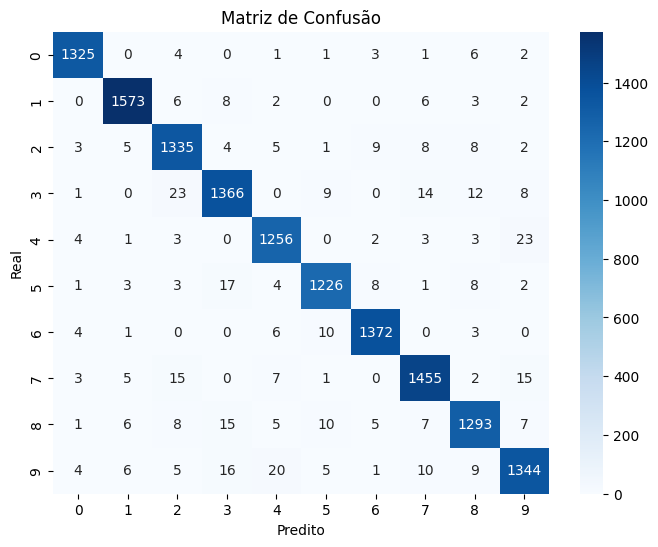

In [29]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Macro média entre todas as classes
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Especificidade: TP / (TP + FN) para cada classe
specificity_per_class = []
for i in range(len(cm)):
    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
    fp = cm[:, i].sum() - cm[i, i]
    specificity = tn / (tn + fp)
    specificity_per_class.append(specificity)

specificity = np.mean(specificity_per_class)  # Média entre todas as classes

# Exibir métricas
print(f'Sensibilidade (Recall): {recall:.4f}')
print(f'Acurácia: {accuracy:.4f}')
print(f'Especificidade: {specificity:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'F-score: {f1:.4f}')

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()